# ebpf-sched evals

In [1]:
import pandas as pd 
import glob 
import os
import plotly.express as px
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA

plt.style.use('seaborn-white')

NB_CPUS=104
NB_VCPUS=8

colors=["#433D3C","#E8E8E8","#BBBFCA","#495464","#e5dcd2","#738156"]



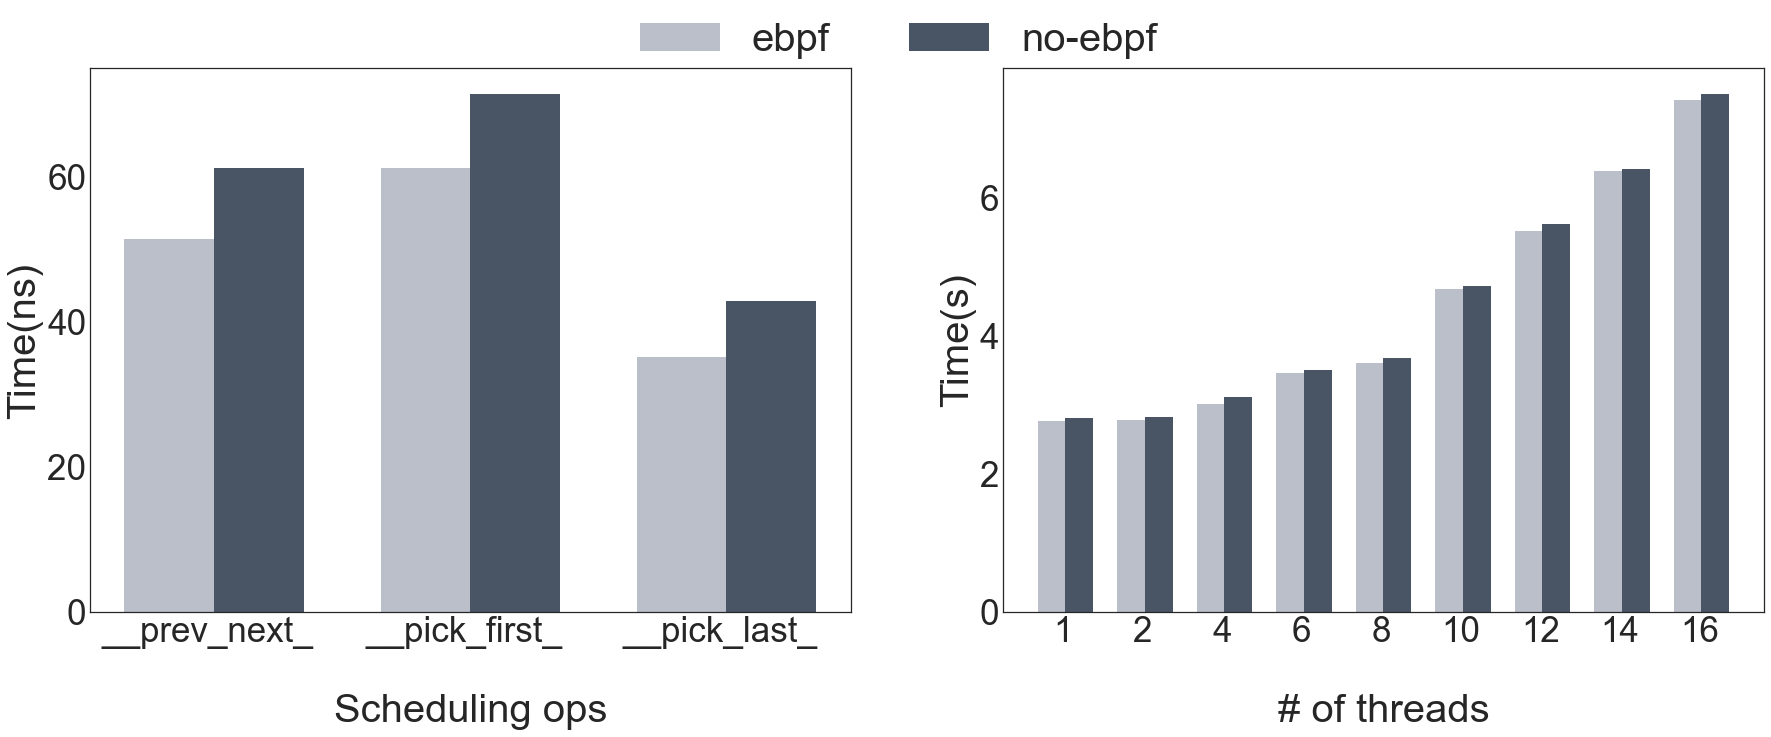

In [7]:

##Overhead for co-existing apps

##Stream, Geekbench, 7z

width = 0.35
df_stream = pd.read_csv("./expes/single_ops.txt",engine="python",sep="\t")
df_geekbench = pd.read_csv("./expes/bench_perf.txt",engine="python",sep="\t")
#complete results here: https://browser.geekbench.com/v5/cpu/8538790 --- no logging
#https://browser.geekbench.com/v5/cpu/8538858 --- logging
df_7z = pd.read_csv("./expes/bench_perf.txt",engine="python",sep="\t")


fig, (ax1, ax2) = plt.subplots(1, 2)

XSIZE=30
YSIZE=10
XLABEL_SIZE=40
YLABEL_SIZE=40
LEGEND_SIZE=40
TICKS_SIZE=35

fig.set_figheight(YSIZE)
fig.set_figwidth(XSIZE)

#stream plot
labels=["__prev_next_","__pick_first_","__pick_last_"]
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]

rects1 = ax1.bar(r1, df_stream['no_ebpf'], width, color=colors[2],label='ebpf')
rects2 = ax1.bar(r2, df_stream['ebpf'], width, color=colors[3], label='no-ebpf')



ax1.set_ylabel('Time(ns)', fontsize=YLABEL_SIZE)
ax1.set_xlabel('\nScheduling ops', fontsize=XLABEL_SIZE)

ax1.set_xticks([r + width-0.2 for r in range(len(labels))])
ax1.set_xticklabels(labels,fontsize=TICKS_SIZE)
ax1.tick_params(axis='y', labelsize=TICKS_SIZE)

#ax1bis = ax1.twinx()

#rects1 = ax1bis.plot(r1, df_stream['withouth_time']*1000, width, marker='o', linestyle='dashed', markersize=20, markerfacecolor="blue", linewidth=6, color=colors[0],label='no_logging')
#rects2 = ax1bis.plot(r2, df_stream['with_time']*1000, width, marker='o', linestyle='dashed', markersize=20, markerfacecolor="blue", linewidth=6, color=colors[1], label='w/ logging')

#ax1bis.set_ylabel('Mean reqs latency (ms)', fontsize=40)
#ax1bis.tick_params(axis='y', labelsize=30)

labels=["1","2","4","6","8","10","12","14","16"]
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
rects1 = ax2.bar(r1, df_7z['ebpf'], width, color=colors[2],label='ebpf')
rects2 = ax2.bar(r2, df_7z['no_ebpf'], width, color=colors[3], label='no-ebpf')

ax2.set_ylabel('Time(s)', fontsize=YLABEL_SIZE)
ax2.set_xlabel('\n# of threads', fontsize=XLABEL_SIZE)


ax2.set_xticks([r + width-0.2 for r in range(len(labels))])
ax2.set_xticklabels(labels,fontsize=TICKS_SIZE)
ax2.tick_params(axis='y', labelsize=TICKS_SIZE)

ax2.legend(bbox_to_anchor =(0.25, 1.15), ncol = 2,fontsize=LEGEND_SIZE)



plt.show()

fig.savefig("overheadlogging_ebpf.pdf",dpi=300)

